<a href="https://colab.research.google.com/github/Abdelrahman-gabr/ML-Specialization-/blob/main/Myfirst_LinearGD_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from scipy import stats


### Load the data set

In [110]:
data = pd.read_csv('movies.csv')
data.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70.0,1.747542,64.0,$41.94,2008.0
1,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,$19.62,2010.0
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,$26.66,2010.0
3,When in Rome,Comedy,Disney,44.0,0.000000,15.0,$43.04,2010.0
4,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,$219.37,2008.0


In [111]:
data.drop('Genre',axis=1,inplace=True)
data.drop('Film',axis=1,inplace=True)
data.drop('Lead Studio',axis=1,inplace=True)
data.drop('Year',axis=1,inplace=True)

In [112]:
data['Worldwide Gross'] = data['Worldwide Gross'].str.replace(',','').str.replace('$','').astype(float)

In [113]:
data.head()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
0,70.0,1.747542,64.0,41.94
1,52.0,1.090000,68.0,19.62
2,35.0,1.211818,43.0,26.66
3,44.0,0.000000,15.0,43.04
4,72.0,6.267647,28.0,219.37


In [114]:
for col in ['Audience score %','Profitability','Rotten Tomatoes %','Worldwide Gross']:
    data[col] = data[col].fillna(data[col].median())

In [116]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# تطبيق على الأعمدة المطلوبة
for col in ['Audience score %','Profitability','Rotten Tomatoes %','Worldwide Gross']:
    data = remove_outliers_iqr(data, col)


In [117]:
data = data.dropna()
data = data.drop_duplicates()

In [118]:
y_train = data['Worldwide Gross']
X_train = data.drop(['Worldwide Gross'], axis=1)

In [119]:
print(y_train)

0      41.94
1      19.62
2      26.66
3      43.04
4     219.37
       ...  
72     29.37
73     30.68
74      8.97
75    160.31
76     60.72
Name: Worldwide Gross, Length: 64, dtype: float64


### Scale/normalize the training data

In [137]:
new_scalar = StandardScaler()
X_norm = new_scalar.fit_transform(X_train)
print(np.ptp(X_norm,axis=0))

[4.09401666 4.42567211 3.54616344]


### Create and fit the regression model

In [138]:
linear_model = SGDRegressor(max_iter= 1000)
linear_model.fit(X_norm,y_train)

SGDRegressor()

In [139]:
w_final = linear_model.coef_
b_final = linear_model.intercept_
print(f"After applying Gredent desent \nw = {w_final} \nb = {b_final}")

After applying Gredent desent 
w = [16.9078894  40.46217742 -7.39389586] 
b = [98.35727341]


In [140]:
y_predict = linear_model.predict(X_norm)
print(f"Actual values =\n {y_train[0:10]}")
print(f"Predicted values = {y_predict[0:10]}")

Actual values =
 0      41.94
1      19.62
2      26.66
3      43.04
4     219.37
5     117.09
8       0.03
9     217.57
10     55.86
13    205.30
Name: Worldwide Gross, dtype: float64
Predicted values = [ 81.64389323  42.8609217   31.04684138  23.93728347 194.67410914
 114.87654078  38.20673637 128.71850268 101.1255725  174.49232902]


### Plot Results
Let's plot the predictions versus the target values.

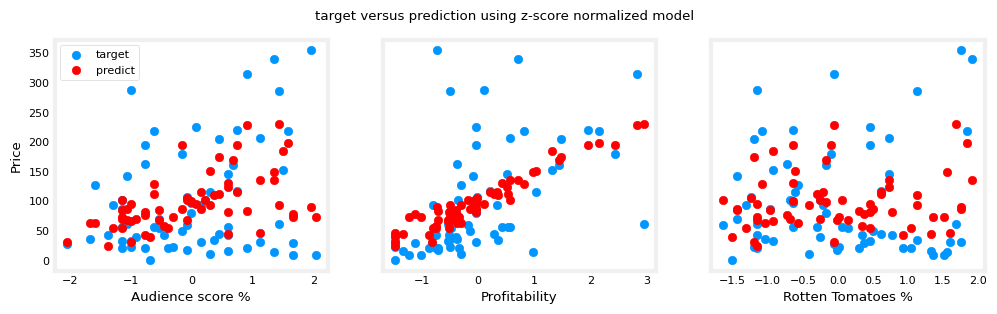

In [141]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
X_features = X_train.columns
for i in range(3):
    ax[i].scatter(X_norm[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_norm[:,i],y_predict,color='red', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()